# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

---

## Background
Human resources (HR) is the main asset that needs to be managed properly by the company so that business goals can be achieved effectively and efficiently. A technology start-up company is facing a problem about the human resources in the company. Therefore, the company wanted to know how to keep employees in the current company, which could result in increased costs for employee recruitment and training for new entrants. By knowing the main factors that cause employees not to feel, the company can immediately overcome it by creating programs that are relevant to employee problems to help the company.

---

## Problem
The company is currently facing a significant issue as many employees have submitted their resignations, yet no decisive action has been taken to address the problem. As the data science team, we will conduct an in-depth analysis to assess the current state of the workforce and investigate the underlying causes driving employee resignations. This will enable the company to devise strategies to reduce employee turnover and improve retention rates.
To address this challenge, we will employ a statistical approach comprising both descriptive and inferential methods. Descriptive statistics and visualizations will be used to provide an overview of the workforce's current condition. Inferential statistics, including machine learning models, will be utilized to identify key factors influencing employee resignations. Based on these insights, we aim to recommend targeted strategies to improve employee retention, ultimately helping the company reduce costs and enhance operational efficiency.

---

## Goal
Adopting a statistical approach that combines descriptive methods (descriptive calculations and visualizations) and inferential methods (machine learning) to address the identified issues.

---

## Objective
1. Importing the necessary libraries and dataset.  
2. Conducting Exploratory Data Analysis (EDA) to understand the overall condition of employees in the company.  
3. Performing data preprocessing, including handling missing values, detecting and addressing anomalies, encoding categorical features, etc.  
4. Building classification models using machine learning techniques.  
5. Selecting the best model based on evaluation metrics.  
6. Fine-tuning the hyperparameters of the best model to achieve optimal results.  
7. Identifying the most influential features affecting employee resignation using feature importance analysis.  
8. Developing business recommendations and strategies based on insights from EDA and machine learning analysis.
   
---

## Dataset
| **Feature**                      | **Explanation**                                  |
|----------------------------------|--------------------------------------------------|
| **Username**                     | Unique employee username.                        |
| **EnterpriseID**                 | ID within the enterprise.                       |
| **StatusPernikahan**             | Marital status.                                 |
| **JenisKelamin**                 | Gender.                                         |
| **StatusKepegawaian**            | Employment status.                              |
| **Pekerjaan**                    | Job position.                                   |
| **JenjangKarir**                 | Career level.                                   |
| **PerformancePegawai**           | Performance rating.                             |
| **AsalDaerah**                   | Region of origin.                               |
| **HiringPlatform**               | Platform used for hiring.                      |
| **SkorSurveyEngagement**         | Engagement score.                               |
| **SkorKepuasanPegawai**          | Employee satisfaction score.                   |
| **JumlahKeikutsertaanProjek**    | Number of projects participated in.            |
| **JumlahKeterlambatanSebulanTerakhir** | Recent monthly delay count.                    |
| **JumlahKetidakhadiran**         | Absence count.                                  |
| **NomorHP**                      | Employee's phone number.                        |
| **Email**                        | Employee's email address.                      |
| **TingkatPendidikan**            | Educational level.                              |
| **PernahBekerja**                | Previous employment history.                   |
| **IkutProgramLOP**               | Participation in a specific program (LOP).     |
| **AlasanResign**                 | Reason for resignation (if applicable).        |
| **TanggalLahir**                 | Date of birth.                                  |
| **TanggalHiring**                | Date of hiring.                                 |
| **TanggalPenilaianKaryawan**     | Date of employee evaluation.                   |
| **TanggalResign**                | Date of resignation.                           |

---

## Metric Evaluation
1. Accuracy : A straightforward metric that gives a clear idea of how well a model is performing overall.

---

## Tool
1. Python Programming Language
2. Jupyter Notebook / Jupyterlab

# 1. Import Library and Dataset

In [6]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [12]:
# import dataset
url = 'https://raw.githubusercontent.com/Yogaaprila/Improving-Employee-Retention-by-Predicting-Employee-Attrition-Using-Machine-Learning/main/Improving%20Employee%20Retention%20by%20Predicting%20Employee%20Attrition%20Using%20Machine%20Learning.xlsx'
df = pd.read_excel(url)
pd.set_option('display.max_columns', None)


df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [14]:
# # import dataset
# df = pd.read_excel('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')
# pd.set_option('display.max_columns', None)

# # print 3 rows of dataset
# df.head(5)

In [5]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [7]:
# convert name columns to lowercase
df.columns = df.columns.str.lower()

In [9]:
# define target variable
df['isresign'] = df['tanggalresign'].apply(lambda x: 0 if x == '-' else 1)

In [11]:
# Replace '-' to NaN
df.replace('-', np.nan, inplace=True)

# Convert date columns to datetime
df['tanggallahir'] = pd.to_datetime(df['tanggallahir'])
df['tanggalhiring'] = pd.to_datetime(df['tanggalhiring'])
df['tanggalresign'] = pd.to_datetime(df['tanggalresign'])

In [13]:
df.head()

,username,enterpriseid,statuspernikahan,jeniskelamin,statuskepegawaian,pekerjaan,jenjangkarir,performancepegawai,asaldaerah,hiringplatform,skorsurveyengagement,skorkepuasanpegawai,jumlahkeikutsertaanprojek,jumlahketerlambatansebulanterakhir,jumlahketidakhadiran,nomorhp,email,tingkatpendidikan,pernahbekerja,ikutprogramlop,alasanresign,tanggallahir,tanggalhiring,tanggalpenilaiankaryawan,tanggalresign,isresign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,NaT,0
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,1
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,1
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,0
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,1


Defines a target variable 'isresign' that takes the values 1 (has resigned) and 0 (has not resigned).

# 2. Data Preprocessing

In [15]:
df_model = df.copy()

## 2.1 Feature Extraction

In [17]:
# Apply mapping
divisi_mapping = {
    'Software Engineer (Back End)': 'Engineering',
    'Software Engineer (Front End)': 'Engineering',
    'Software Engineer (Android)': 'Engineering',
    'Software Engineer (iOS)': 'Engineering',
    'DevOps Engineer': 'Engineering',
    'Software Architect': 'Engineering',
    'Data Analyst': 'Data',
    'Data Engineer': 'Data',
    'Machine Learning Engineer': 'Data',
    'Product Manager': 'Product',
    'Digital Product Manager': 'Product',
    'Scrum Master': 'Product',
    'Product Design (UX Researcher)': 'Design',
    'Product Design (UI & UX)': 'Design'
}

# add 'divisi' columns to data based on mapping
df_model['divisi'] = df_model['pekerjaan'].map(divisi_mapping)

# Convert 'keikutsertaanprject' to boolean
df_model["keikutsertaanproject_boolean"] = df_model["jumlahkeikutsertaanprojek"].map(lambda x: 1 if x!=0 else 0)

# create 'usia_hired' column
df_model['usia_saat_dihired'] = df_model['tanggalhiring'].dt.year - df_model['tanggallahir'].dt.year - (
    (df_model['tanggalhiring'].dt.month < df_model['tanggallahir'].dt.month) |
    ((df_model['tanggalhiring'].dt.month == df_model['tanggallahir'].dt.month) & (df_model['tanggalhiring'].dt.day < df_model['tanggallahir'].dt.day))
).astype(int)

# create 'lamaa bekerja' columns
df_model['lama_bekerja'] = ((df_model['tanggalresign'].fillna(pd.Timestamp.now()) - df_model['tanggalhiring']).dt.days) / 365.25

In [19]:
df_model.head()

,username,enterpriseid,statuspernikahan,jeniskelamin,statuskepegawaian,pekerjaan,jenjangkarir,performancepegawai,asaldaerah,hiringplatform,skorsurveyengagement,skorkepuasanpegawai,jumlahkeikutsertaanprojek,jumlahketerlambatansebulanterakhir,jumlahketidakhadiran,nomorhp,email,tingkatpendidikan,pernahbekerja,ikutprogramlop,alasanresign,tanggallahir,tanggalhiring,tanggalpenilaiankaryawan,tanggalresign,isresign,divisi,keikutsertaanproject_boolean,usia_saat_dihired,lama_bekerja
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,NaT,0,Engineering,0,38,14.028747
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,1,Data,1,29,4.440794
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,1,Engineering,0,37,3.704312
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,0,Engineering,0,34,10.924025
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,1,Product,0,39,4.818617


## 2.2 Drop Unnecessary Columns

In [21]:
df_model = df_model.drop(['username','enterpriseid','nomorhp','email','tanggallahir', 'tanggalhiring','jumlahkeikutsertaanprojek',
                          'tanggalpenilaiankaryawan','tanggalresign','pernahbekerja','alasanresign',
                          'ikutprogramlop','hiringplatform','pekerjaan','asaldaerah'],axis=1)

In [23]:
df_model.head()

,statuspernikahan,jeniskelamin,statuskepegawaian,jenjangkarir,performancepegawai,skorsurveyengagement,skorkepuasanpegawai,jumlahketerlambatansebulanterakhir,jumlahketidakhadiran,tingkatpendidikan,isresign,divisi,keikutsertaanproject_boolean,usia_saat_dihired,lama_bekerja
0,Belum_menikah,Pria,Outsource,Freshgraduate_program,Sangat_bagus,4,4.0,0.0,9.0,Magister,0,Engineering,0,38,14.028747
1,Belum_menikah,Pria,FullTime,Freshgraduate_program,Sangat_kurang,4,4.0,0.0,3.0,Sarjana,1,Data,1,29,4.440794
2,Menikah,Pria,FullTime,Freshgraduate_program,Bagus,4,3.0,0.0,11.0,Magister,1,Engineering,0,37,3.704312
3,Belum_menikah,Pria,Outsource,Freshgraduate_program,Bagus,3,3.0,4.0,6.0,Sarjana,0,Engineering,0,34,10.924025
4,Belum_menikah,Wanita,FullTime,Freshgraduate_program,Bagus,3,3.0,0.0,11.0,Sarjana,1,Product,0,39,4.818617


## 2.3 Check Unique Values For Each Columns

In [25]:
# Selected columns
columns_to_count = ['statuspernikahan', 'jeniskelamin', 'statuskepegawaian', 'jenjangkarir',
       'performancepegawai', 'skorsurveyengagement', 'skorkepuasanpegawai',
       'jumlahketerlambatansebulanterakhir', 'jumlahketidakhadiran',
       'tingkatpendidikan', 'isresign', 'divisi',
       'keikutsertaanproject_boolean', 'usia_saat_dihired', 'lama_bekerja']

# Iteration to print unique valuer for each selected columns
for column in columns_to_count:
    print(f"Value counts for '{column}':")
    print(df_model[column].unique())
    print('-' * 40)

Value counts for 'statuspernikahan':
['Belum_menikah' 'Menikah' 'Bercerai' 'Lainnya' nan]
----------------------------------------
Value counts for 'jeniskelamin':
['Pria' 'Wanita']
----------------------------------------
Value counts for 'statuskepegawaian':
['Outsource' 'FullTime' 'Internship']
----------------------------------------
Value counts for 'jenjangkarir':
['Freshgraduate_program' 'Senior_level' 'Mid_level']
----------------------------------------
Value counts for 'performancepegawai':
['Sangat_bagus' 'Sangat_kurang' 'Bagus' 'Biasa' 'Kurang']
----------------------------------------
Value counts for 'skorsurveyengagement':
[4 3 2 1 5]
----------------------------------------
Value counts for 'skorkepuasanpegawai':
[ 4.  3.  5. nan  2.  1.]
----------------------------------------
Value counts for 'jumlahketerlambatansebulanterakhir':
[ 0.  4.  3.  5.  2.  6.  1. nan]
----------------------------------------
Value counts for 'jumlahketidakhadiran':
[ 9.  3. 11.  6. 10. 19

## 2.4 Check Frequency of Unique Value per columns

In [27]:
# Iteration to print frequency of unique valuer for each selected columns
for column in columns_to_count:
    print(f"Value counts for '{column}':")
    print(df_model[column].value_counts())
    print('-' * 40)

Value counts for 'statuspernikahan':
statuspernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
Name: count, dtype: int64
----------------------------------------
Value counts for 'jeniskelamin':
jeniskelamin
Wanita    167
Pria      120
Name: count, dtype: int64
----------------------------------------
Value counts for 'statuskepegawaian':
statuskepegawaian
FullTime      217
Outsource      66
Internship      4
Name: count, dtype: int64
----------------------------------------
Value counts for 'jenjangkarir':
jenjangkarir
Freshgraduate_program    169
Mid_level                 70
Senior_level              48
Name: count, dtype: int64
----------------------------------------
Value counts for 'performancepegawai':
performancepegawai
Biasa            85
Bagus            74
Sangat_bagus     73
Kurang           31
Sangat_kurang    24
Name: count, dtype: int64
----------------------------------------
Value counts for 'skorsurveyengagement':
skorsurveye

## 2.5 Handle Missing Value

In [29]:
# missing value
df_model.isnull().sum()

statuspernikahan                      3
jeniskelamin                          0
statuskepegawaian                     0
jenjangkarir                          0
performancepegawai                    0
skorsurveyengagement                  0
skorkepuasanpegawai                   5
jumlahketerlambatansebulanterakhir    1
jumlahketidakhadiran                  6
tingkatpendidikan                     0
isresign                              0
divisi                                0
keikutsertaanproject_boolean          0
usia_saat_dihired                     0
lama_bekerja                          0
dtype: int64

Null values in numerical columns will be imputed with median value.

In [31]:
# fill missing value in numeric columns with median
numerik_cols = df_model.select_dtypes(include=['number']).columns

for col in numerik_cols:
    median_value = df_model[col].median()
    df_model[col].fillna(median_value, inplace=True)

# fill missing value in categorical column with mode
mode_gender = df_model['statuspernikahan'].mode()[0]
df_model['statuspernikahan'].fillna(mode_gender, inplace=True)

In [33]:
df_model.isnull().sum()

statuspernikahan                      0
jeniskelamin                          0
statuskepegawaian                     0
jenjangkarir                          0
performancepegawai                    0
skorsurveyengagement                  0
skorkepuasanpegawai                   0
jumlahketerlambatansebulanterakhir    0
jumlahketidakhadiran                  0
tingkatpendidikan                     0
isresign                              0
divisi                                0
keikutsertaanproject_boolean          0
usia_saat_dihired                     0
lama_bekerja                          0
dtype: int64

## 2.6 Handle Duplicate Row

In [35]:
# check duplicate rows
data_duplicated = df_model.duplicated().any()

if data_duplicated == False:
    print('Data has not duplicate rows')
else:
    print('Data has duplicate rows')

Data has not duplicate rows


## 2.7 Handle Infinite Value

In [37]:
#  Only Select numerical columns
numeric_cols = df_model.select_dtypes(include=[np.number])

# Check whether there are infitnite value or not
has_infinite = numeric_cols.applymap(np.isinf)

# Display columns that contain infinite value
cols_with_infinite = has_infinite.any()
print("Column With Infinite Value:",cols_with_infinite[cols_with_infinite].index.tolist())

Column With Infinite Value: []


Numerical columns has not infinite value.

Use this dataset for modeling at fourth step (modeling).

# 3. Exploratory Data Analysis

## 3.1. Annual Report on Employee Number Changes

In [39]:
df_eda = df.copy()

In [41]:
# Extract year from TanggalHiring and TanggalResign
df_eda['tahunhiring'] = df_eda['tanggalhiring'].dt.year
df_eda['tahunresign'] = df_eda['tanggalresign'].dt.year

# Aggregate table of number of incoming employees by hiring year
hiring_agg = df_eda.groupby('tahunhiring').size().reset_index(name='jumlah_karyawan_masuk')

# Aggregate table of employee exits by year of resignation
resign_agg = df_eda.groupby('tahunresign').size().reset_index(name='jumlah_karyawan_keluar')

# convert tahunresign to interger
resign_agg['tahunresign'] = resign_agg['tahunresign'].round().astype('int64')

In [43]:
# print data
display(resign_agg)
display(hiring_agg)

,tahunresign,jumlah_karyawan_keluar
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


,tahunhiring,jumlah_karyawan_masuk
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [45]:
# do join using merge
tabel_final = pd.merge(
    hiring_agg,
    resign_agg,
    left_on='tahunhiring',
    right_on='tahunresign',
    how='outer'
)

# Merge the year columns from both tables into one 'tahun' column
tabel_final['tahun'] = tabel_final['tahunhiring'].combine_first(tabel_final['tahunresign'])

# Remove the original key column after merging
tabel_final = tabel_final.drop(columns=['tahunhiring', 'tahunresign'])

# Customize the join result column and fill the NaN value with 0
tabel_final = tabel_final.rename(columns={
    'jumlah_karyawan_masuk': 'jumlah_karyawan_masuk',
    'jumlah_karyawan_keluar': 'jumlah_karyawan_keluar'
}).fillna(0)

# Set column order
tabel_final = tabel_final[['tahun', 'jumlah_karyawan_masuk', 'jumlah_karyawan_keluar']]

# Chech datatype
tabel_final['jumlah_karyawan_masuk'] = tabel_final['jumlah_karyawan_masuk'].astype(int)
tabel_final['jumlah_karyawan_keluar'] = tabel_final['jumlah_karyawan_keluar'].astype(int)

# convert tahunresign to interger
tabel_final['tahun'] = tabel_final['tahun'].round().astype('int64')

In [47]:
tabel_final.head()

,tahun,jumlah_karyawan_masuk,jumlah_karyawan_keluar
0,2006,1,0
1,2007,2,0
2,2008,2,0
3,2009,7,0
4,2010,8,0


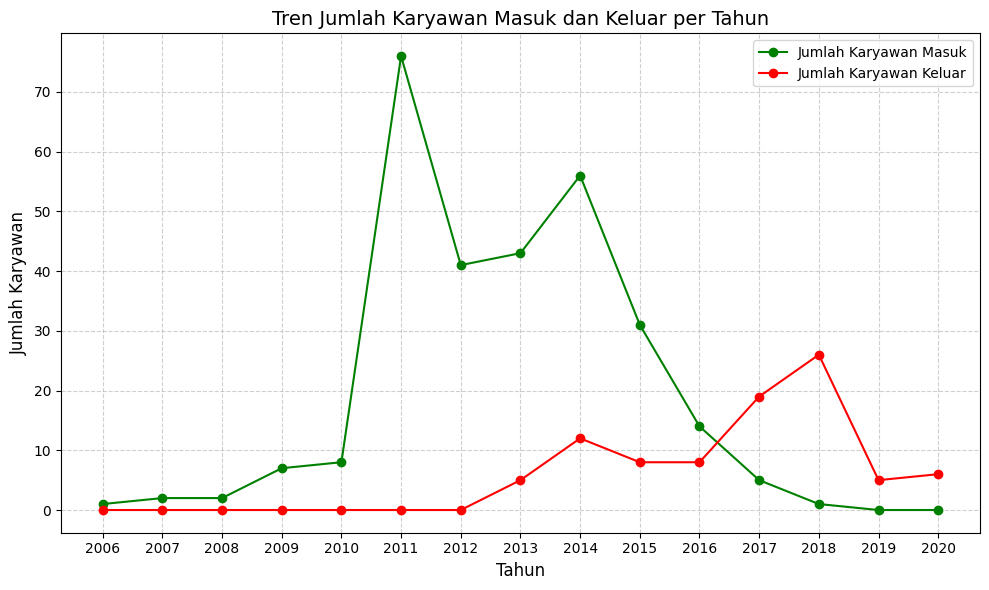

In [49]:
# Plot tren
plt.figure(figsize=(10, 6))

# Plot of the number of incoming employees
plt.plot(
    tabel_final['tahun'], 
    tabel_final['jumlah_karyawan_masuk'], 
    marker='o', 
    label='Jumlah Karyawan Masuk', 
    color='green'
)

# Plot of the number of exit employee
plt.plot(
    tabel_final['tahun'], 
    tabel_final['jumlah_karyawan_keluar'], 
    marker='o', 
    label='Jumlah Karyawan Keluar', 
    color='red'
)

# Add label, title, and legend
plt.title('Tren Jumlah Karyawan Masuk dan Keluar per Tahun', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(tabel_final['tahun'])  

# Display plot
plt.tight_layout()
plt.show()

## 3.2. Resign Reason Analysis for Employee Attrition Management Strategy

In [51]:
df_eda.head()

,username,enterpriseid,statuspernikahan,jeniskelamin,statuskepegawaian,pekerjaan,jenjangkarir,performancepegawai,asaldaerah,hiringplatform,skorsurveyengagement,skorkepuasanpegawai,jumlahkeikutsertaanprojek,jumlahketerlambatansebulanterakhir,jumlahketidakhadiran,nomorhp,email,tingkatpendidikan,pernahbekerja,ikutprogramlop,alasanresign,tanggallahir,tanggalhiring,tanggalpenilaiankaryawan,tanggalresign,isresign,tahunhiring,tahunresign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,NaT,0,2011,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,1,2014,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,1,2011,2014.0
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,0,2014,NaN
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,1,2013,2018.0


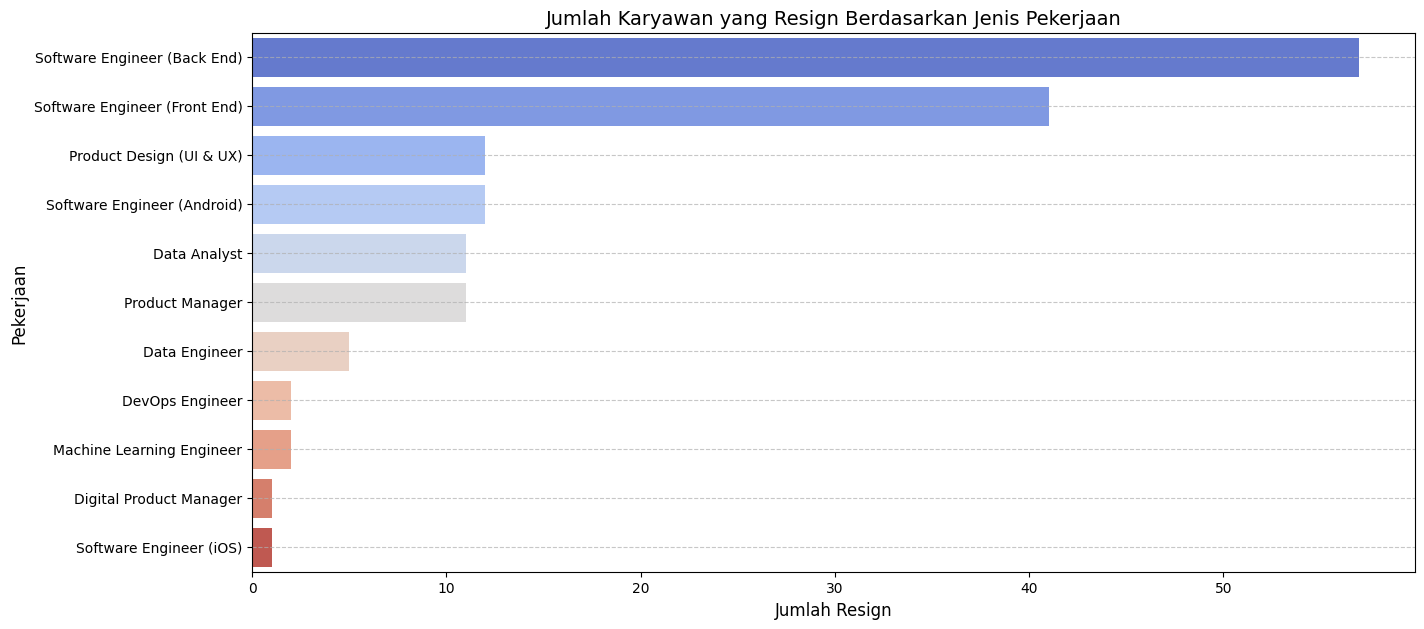

In [53]:
# filter data only inclued employee who have resigned
df_eda_resign = df_eda[df_eda['alasanresign'] != 'masih_bekerja']

# Calculate number of resigned employee based on job
resign_count = df_eda_resign['pekerjaan'].value_counts().reset_index()
resign_count.columns = ['pekerjaan', 'count']

# Visualization
plt.figure(figsize=(15, 7))
sns.barplot(x='count', y='pekerjaan', data=resign_count, palette='coolwarm')
plt.title('Jumlah Karyawan yang Resign Berdasarkan Jenis Pekerjaan', fontsize=14)
plt.xlabel('Jumlah Resign', fontsize=12)
plt.ylabel('Pekerjaan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

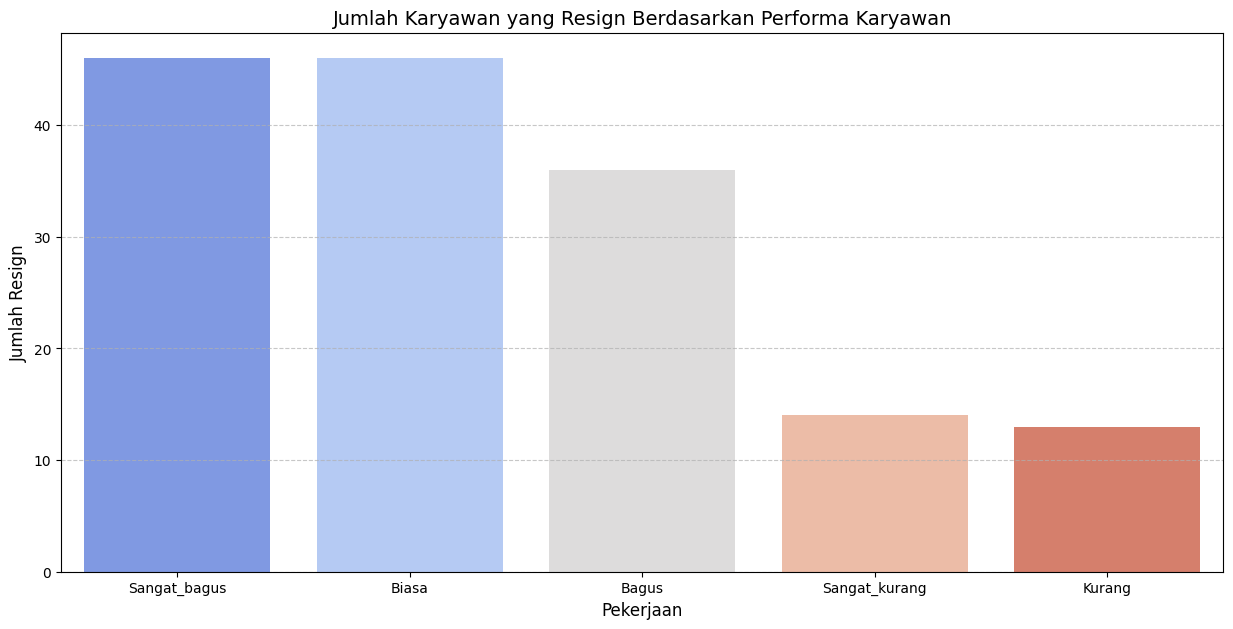

In [55]:
# filter data include only employee who have resigned
df_eda_resign = df_eda[df_eda['alasanresign'] != 'masih_bekerja']

# Count the number of employees who resigned based on their employee performance
resign_count = df_eda_resign['performancepegawai'].value_counts().reset_index()
resign_count.columns = ['performancepegawai', 'count']

# Visualization
plt.figure(figsize=(15, 7))
sns.barplot(x='performancepegawai', y='count', data=resign_count, palette='coolwarm')
plt.title('Jumlah Karyawan yang Resign Berdasarkan Performa Karyawan', fontsize=14)
plt.xlabel('Pekerjaan', fontsize=12)
plt.ylabel('Jumlah Resign', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

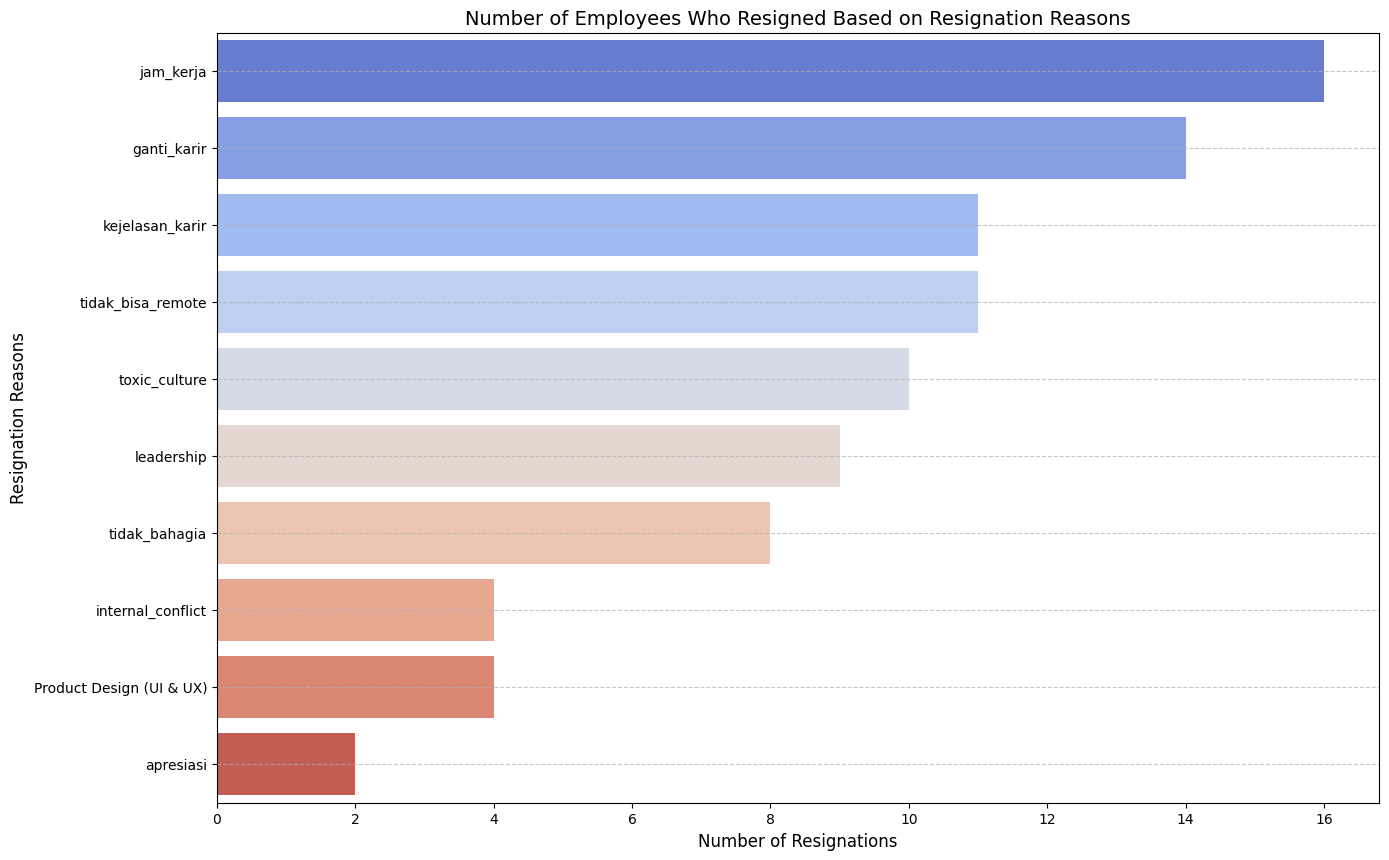

In [57]:
# Filter data to include only employees who have resigned
df_eda_resign = df_eda[df_eda['alasanresign'] != 'masih_bekerja']

# Count the number of employees who resigned based on their resignation reasons
resign_count = df_eda_resign['alasanresign'].value_counts().reset_index()
resign_count.columns = ['alasanresign', 'count']

# Visualization
plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='alasanresign', data=resign_count, palette='coolwarm')
plt.title('Number of Employees Who Resigned Based on Resignation Reasons', fontsize=14)
plt.xlabel('Number of Resignations', fontsize=12)
plt.ylabel('Resignation Reasons', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


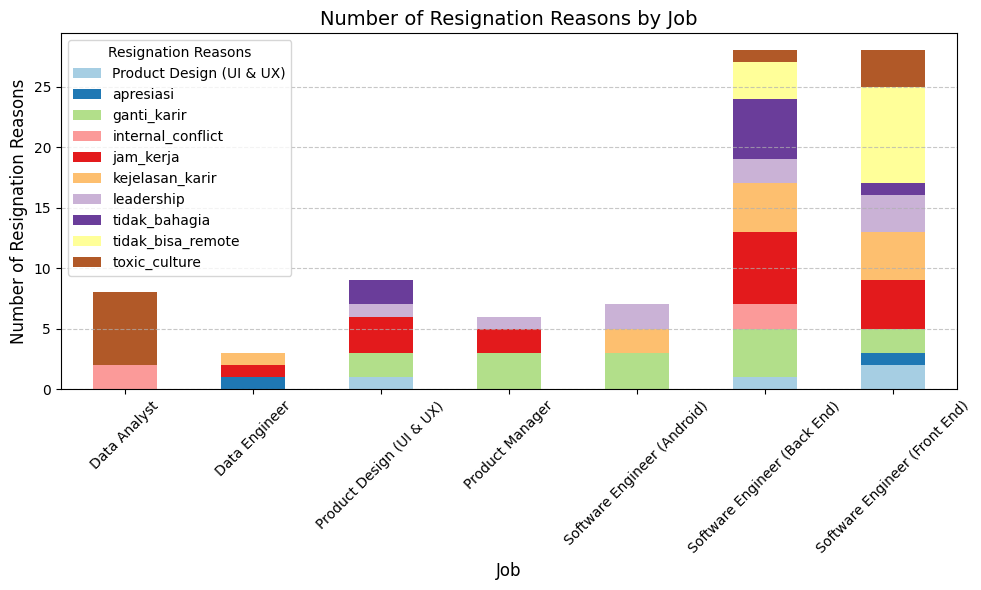

In [59]:
# Filter data to include only employees who have resigned
df_eda_resign = df_eda[df_eda['alasanresign'] != 'masih_bekerja']

# Count the number of resignation reasons per job
alasan_count = df_eda_resign.groupby(['pekerjaan', 'alasanresign']).size().unstack(fill_value=0)

# Plot a stacked bar chart
alasan_count.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Number of Resignation Reasons by Job', fontsize=14)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Number of Resignation Reasons', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Resignation Reasons', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 4. Build an Automated Resignation Behavior Prediction using Machine Learning

## 4.1 Feature Encoding

1. Status Pernikahan -> one hot encoding.
2. jenis kelamin -> label encoding (pria=1, wanita=0)
3. status kepegawaian -> label encoding(internship=0, outsource=1, fulltime=2).
4. divisi -> one hot encoding.
5. jenjang karir -> label encoding (Freshgraduate_program=0, Mid_level=1, Senior_level=2).
6. performance pegawai -> label encoding (Sangat_Kurang=0, Kurang=1, Biasa=2, Bagus=3, Sangat_bagus=4).
9. tingkat pendidikan -> label encoding (Sarjana=0, Magister=1, Doktor=2).

In [61]:
df_model.head()

,statuspernikahan,jeniskelamin,statuskepegawaian,jenjangkarir,performancepegawai,skorsurveyengagement,skorkepuasanpegawai,jumlahketerlambatansebulanterakhir,jumlahketidakhadiran,tingkatpendidikan,isresign,divisi,keikutsertaanproject_boolean,usia_saat_dihired,lama_bekerja
0,Belum_menikah,Pria,Outsource,Freshgraduate_program,Sangat_bagus,4,4.0,0.0,9.0,Magister,0,Engineering,0,38,14.028747
1,Belum_menikah,Pria,FullTime,Freshgraduate_program,Sangat_kurang,4,4.0,0.0,3.0,Sarjana,1,Data,1,29,4.440794
2,Menikah,Pria,FullTime,Freshgraduate_program,Bagus,4,3.0,0.0,11.0,Magister,1,Engineering,0,37,3.704312
3,Belum_menikah,Pria,Outsource,Freshgraduate_program,Bagus,3,3.0,4.0,6.0,Sarjana,0,Engineering,0,34,10.924025
4,Belum_menikah,Wanita,FullTime,Freshgraduate_program,Bagus,3,3.0,0.0,11.0,Sarjana,1,Product,0,39,4.818617


In [63]:
# Label Encoding
# use label encoding for ordinal column
gender_mapping = {'Pria':1,
                  'Wanita':0
    
}


pegawai_mapping = {'Internship':0,
                   'Outsource':1,
                   'FullTime':2
    
}


jenjangkarir_mapping = {'Freshgraduate_program': 0,
                        'Senior_level': 2,
                        'Mid_level':1
    
}

performance_mapping = {'Sangat_kurang': 0,
                       'Kurang': 1,
                       'Biasa':2,
                       'Bagus':3,
                       'Sangat_bagus':4
    
}

pendidikan_mapping = {'Sarjana': 0,
                      'Magister': 1,
                      'Doktor':2
    
}

df_model['jeniskelamin'] = df_model['jeniskelamin'].map(gender_mapping)
df_model['statuskepegawaian'] = df_model['statuskepegawaian'].map(pegawai_mapping)
df_model['jenjangkarir'] = df_model['jenjangkarir'].map(jenjangkarir_mapping)
df_model['performancepegawai'] = df_model['performancepegawai'].map(performance_mapping)
df_model['tingkatpendidikan'] = df_model['tingkatpendidikan'].map(pendidikan_mapping)

In [65]:
# One hot encoding
# applying one hot encoding on nominal columns
df_model = pd.get_dummies(df_model, columns=['statuspernikahan'], prefix='statuspernikahan')
df_model = pd.get_dummies(df_model, columns=['divisi'], prefix='divisi')

# convert to integer
df_model[df_model.columns[df_model.columns.str.startswith('statuspernikahan')]] = df_model[df_model.columns[df_model.columns.str.startswith('statuspernikahan')]].astype(int)
df_model[df_model.columns[df_model.columns.str.startswith('divisi')]] = df_model[df_model.columns[df_model.columns.str.startswith('divisi')]].astype(int)

In [67]:
df_model.head()

,jeniskelamin,statuskepegawaian,jenjangkarir,performancepegawai,skorsurveyengagement,skorkepuasanpegawai,jumlahketerlambatansebulanterakhir,jumlahketidakhadiran,tingkatpendidikan,isresign,keikutsertaanproject_boolean,usia_saat_dihired,lama_bekerja,statuspernikahan_Belum_menikah,statuspernikahan_Bercerai,statuspernikahan_Lainnya,statuspernikahan_Menikah,divisi_Data,divisi_Design,divisi_Engineering,divisi_Product
0,1,1,0,4,4,4.0,0.0,9.0,1,0,0,38,14.028747,1,0,0,0,0,0,1,0
1,1,2,0,0,4,4.0,0.0,3.0,0,1,1,29,4.440794,1,0,0,0,1,0,0,0
2,1,2,0,3,4,3.0,0.0,11.0,1,1,0,37,3.704312,0,0,0,1,0,0,1,0
3,1,1,0,3,3,3.0,4.0,6.0,0,0,0,34,10.924025,1,0,0,0,0,0,1,0
4,0,2,0,3,3,3.0,0.0,11.0,0,1,0,39,4.818617,1,0,0,0,0,0,0,1


In [69]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   jeniskelamin                        287 non-null    int64  
 1   statuskepegawaian                   287 non-null    int64  
 2   jenjangkarir                        287 non-null    int64  
 3   performancepegawai                  287 non-null    int64  
 4   skorsurveyengagement                287 non-null    int64  
 5   skorkepuasanpegawai                 287 non-null    float64
 6   jumlahketerlambatansebulanterakhir  287 non-null    float64
 7   jumlahketidakhadiran                287 non-null    float64
 8   tingkatpendidikan                   287 non-null    int64  
 9   isresign                            287 non-null    int64  
 10  keikutsertaanproject_boolean        287 non-null    int64  
 11  usia_saat_dihired                   287 non-n

## 4.2 Multicollinearity Test (Heatmap)

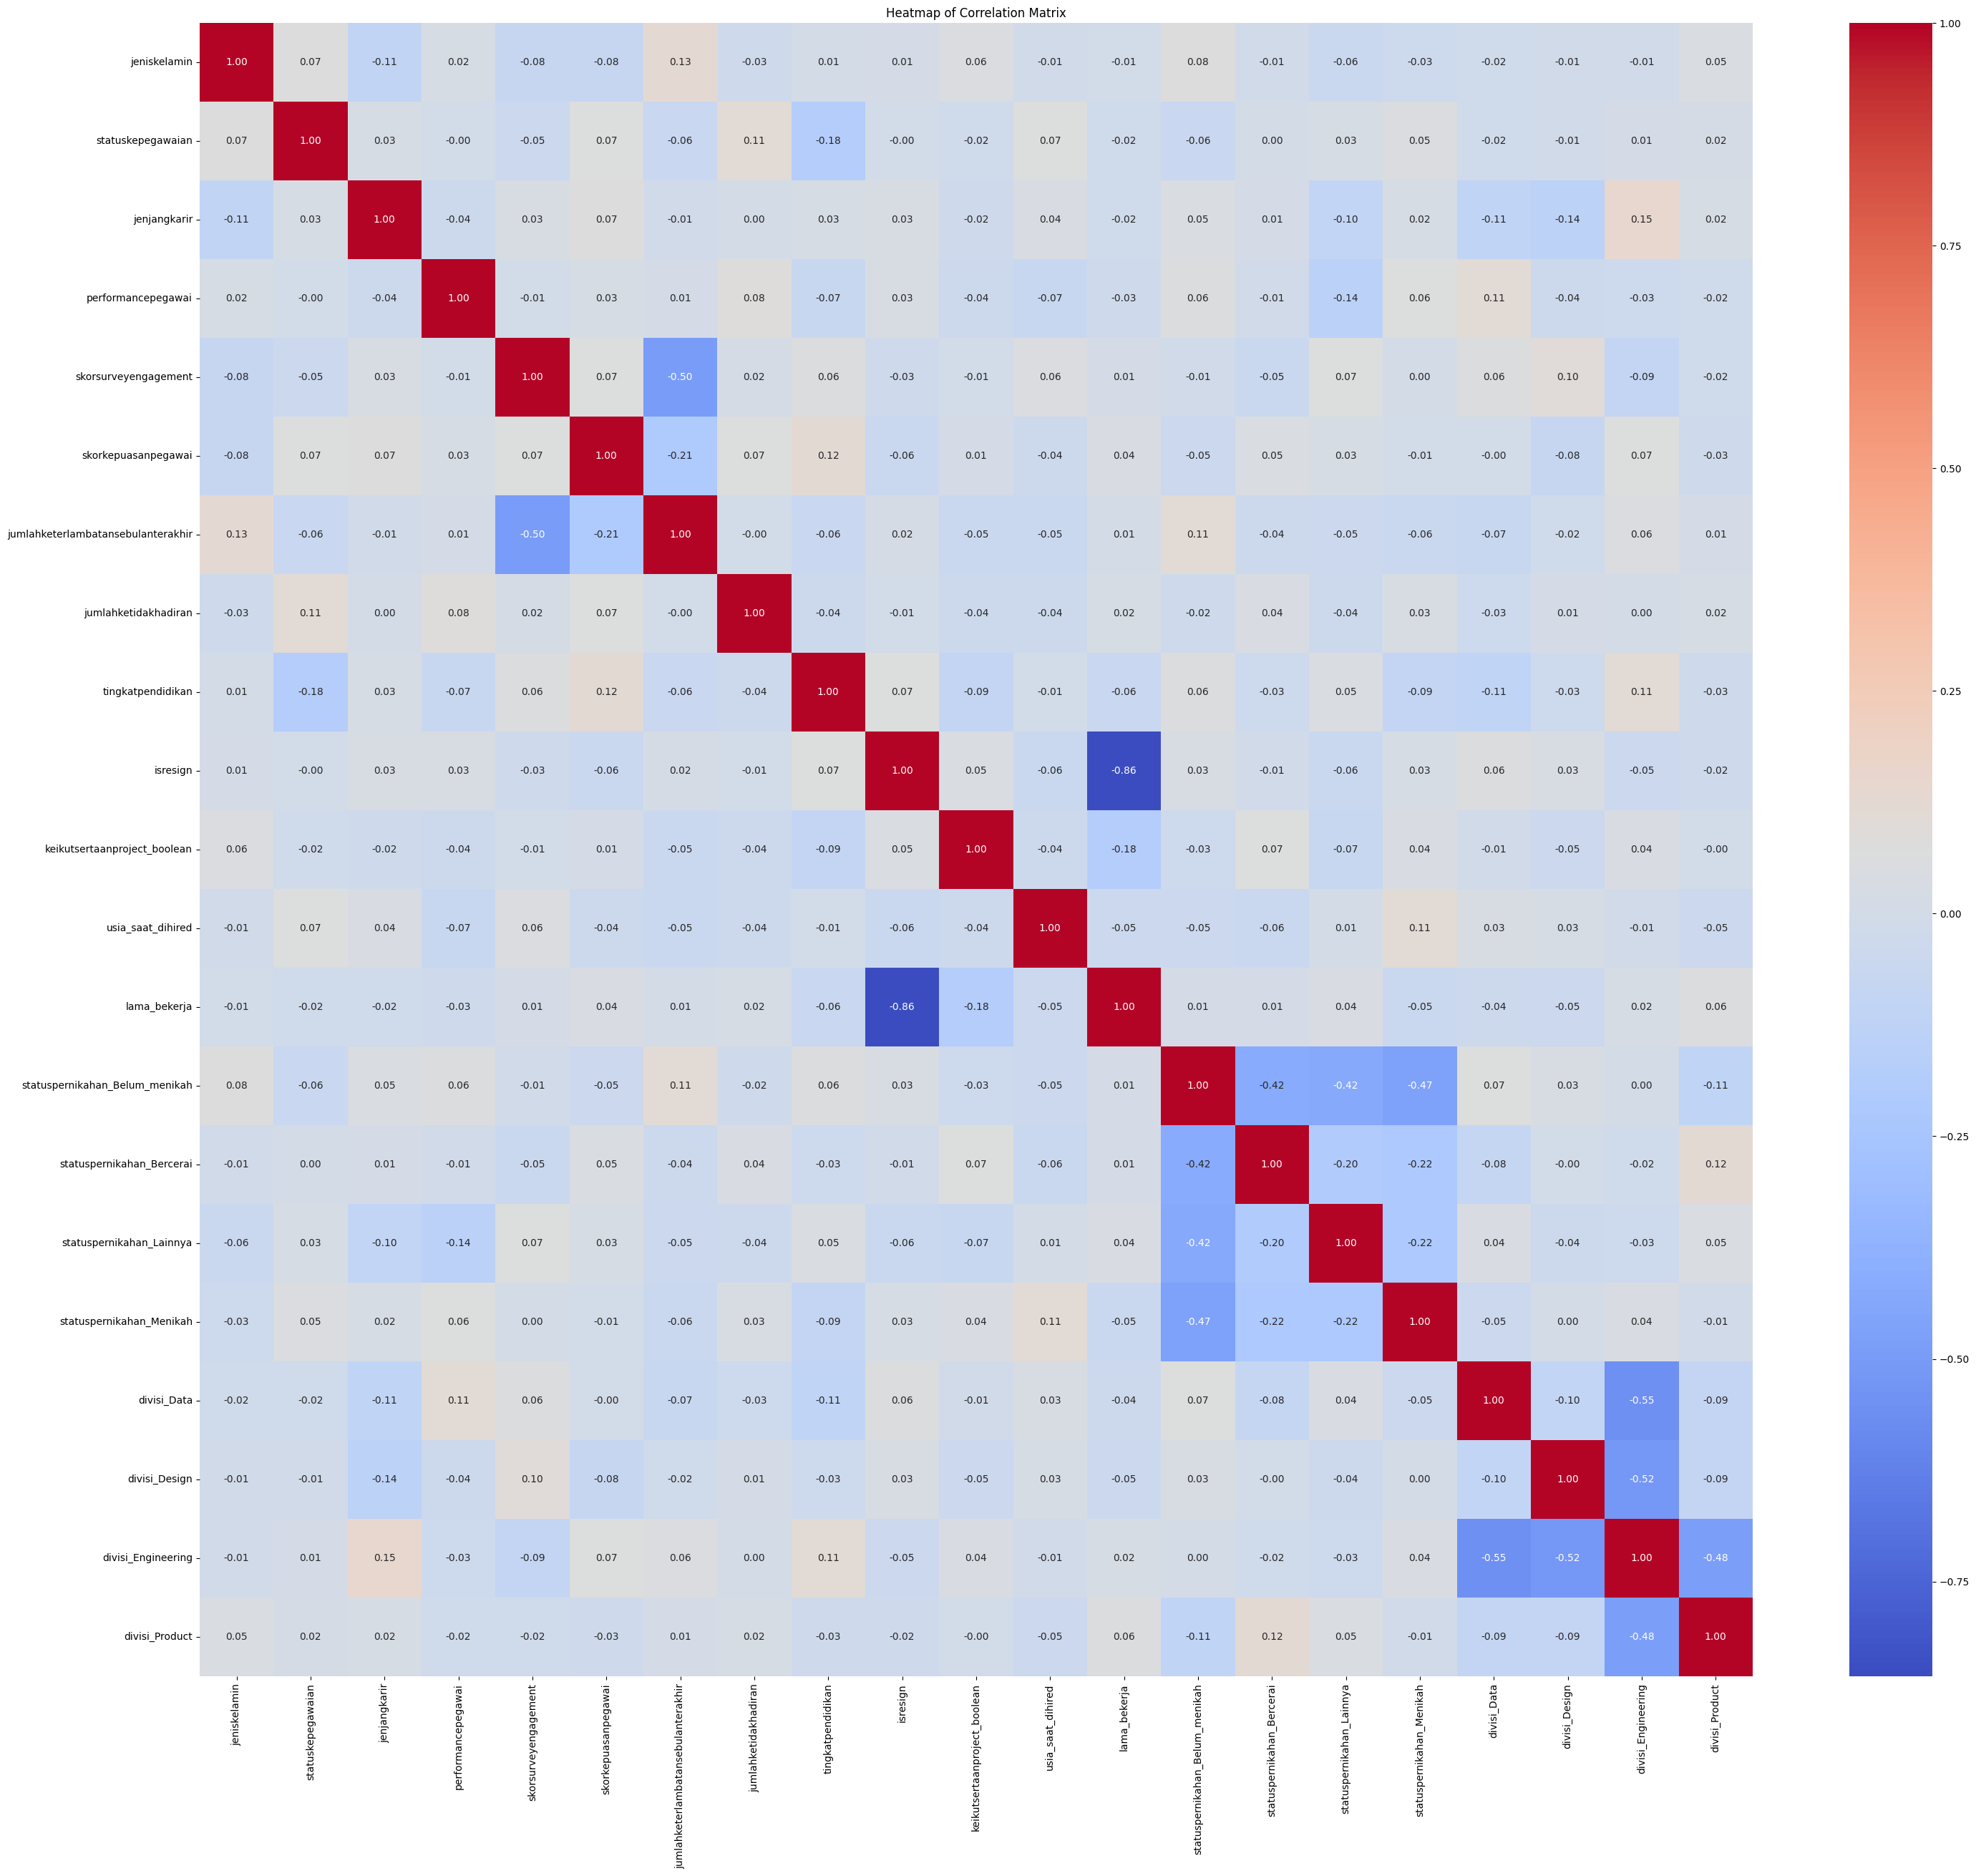

Features with High Multicollinearity:
      Feature 1 Feature 2  Correlation
0  lama_bekerja  isresign    -0.856545


In [71]:
# Calculate Correlation
correlation_matrix = df_model.corr()

# Visualize Heatmap
plt.figure(figsize=(35,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Get Paired Feature with high correlation (> 0.7 or < -0.7)
high_corr_pairs = []
threshold = 0.7
for i in range(len(correlation_matrix.columns)):
    for j in range(i): 
        if (correlation_matrix.iloc[i, j] > threshold) or (correlation_matrix.iloc[i, j] < -threshold):
            high_corr_pairs.append((
                correlation_matrix.index[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

# print in dataframe
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

print("Features with High Multicollinearity:")
print(high_corr_df)

## 4.3 Handle Class Imbalance

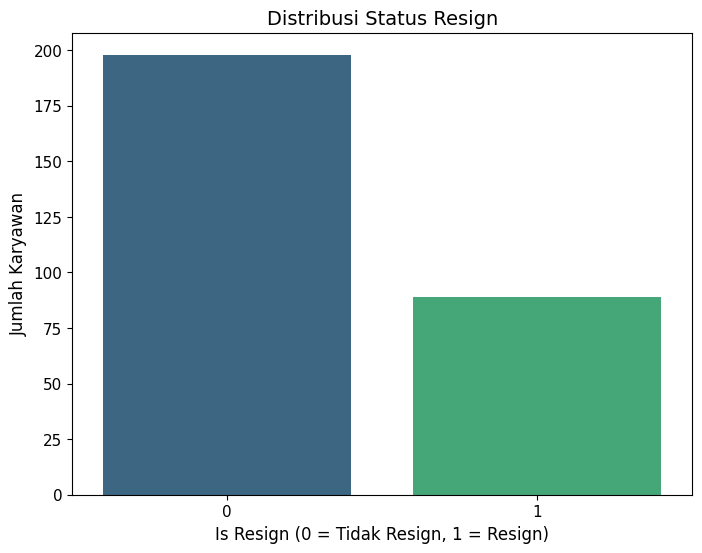

isresign
0    198
1     89
Name: count, dtype: int64


In [73]:
# Calculate distribution of 'isresign' colum
isresign_counts = df_model['isresign'].value_counts()

# Create barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=isresign_counts.index, y=isresign_counts.values, palette='viridis')

# add label and title
plt.xlabel('Is Resign (0 = Tidak Resign, 1 = Resign)', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
plt.title('Distribusi Status Resign', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# show visualisize
plt.show()
print(isresign_counts)

In [75]:
# Separate feature and target
X = df_model.drop(columns=['isresign'])  
y = df_model['isresign']  

# Initialize SMOTE with desired sampling ratio
smote = SMOTE(sampling_strategy={0: 198, 1: 195}, random_state=42)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Merge to dataframe
df_model_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['isresign'])], axis=1)

# show distribution of class
print(df_model_resampled['isresign'].value_counts())

isresign
0    198
1    195
Name: count, dtype: int64


In [77]:
df_model_resampled.head()

,jeniskelamin,statuskepegawaian,jenjangkarir,performancepegawai,skorsurveyengagement,skorkepuasanpegawai,jumlahketerlambatansebulanterakhir,jumlahketidakhadiran,tingkatpendidikan,keikutsertaanproject_boolean,usia_saat_dihired,lama_bekerja,statuspernikahan_Belum_menikah,statuspernikahan_Bercerai,statuspernikahan_Lainnya,statuspernikahan_Menikah,divisi_Data,divisi_Design,divisi_Engineering,divisi_Product,isresign
0,1,1,0,4,4,4.0,0.0,9.0,1,0,38,14.028747,1,0,0,0,0,0,1,0,0
1,1,2,0,0,4,4.0,0.0,3.0,0,1,29,4.440794,1,0,0,0,1,0,0,0,1
2,1,2,0,3,4,3.0,0.0,11.0,1,0,37,3.704312,0,0,0,1,0,0,1,0,1
3,1,1,0,3,3,3.0,4.0,6.0,0,0,34,10.924025,1,0,0,0,0,0,1,0,0
4,0,2,0,3,3,3.0,0.0,11.0,0,0,39,4.818617,1,0,0,0,0,0,0,1,1


In [79]:
df_model.shape

(287, 21)

In [81]:
df_model_resampled.shape

(393, 21)

## 4.4 Handle Outliers

In [83]:
# Identify outliers for each numerical column
numerical_cols = df_model_resampled.select_dtypes(include=['number']).columns

# Determine the lower and upper bounds for outlier detection
Q1 = df_model_resampled[numerical_cols].quantile(0.25)  # First quartile
Q3 = df_model_resampled[numerical_cols].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Mark rows as outliers (True for outliers)
outliers = ((df_model_resampled[numerical_cols] < (Q1 - 1.5 * IQR)) | 
            (df_model_resampled[numerical_cols] > (Q3 + 1.5 * IQR)))

# Count the number of outliers per column
outliers_per_column = outliers.sum()

# Calculate the percentage of outliers per column
outlier_percentage_per_column = (outliers_per_column / len(df_model_resampled)) * 100

# Count the total rows that contain outliers in any column
outlier_rows = outliers.any(axis=1).sum()

# Calculate the overall percentage of outliers
total_outlier_percentage = (outlier_rows / len(df_model_resampled)) * 100

print("\nNumber of outliers per column:")
print(outliers_per_column)
print("\nPercentage of outliers per column:")
print(outlier_percentage_per_column)
print("\nTotal Percentage of Outliers: {:.2f}%".format(total_outlier_percentage))


Number of outliers per column:
jeniskelamin                           0
statuskepegawaian                      0
jenjangkarir                           0
performancepegawai                    33
skorsurveyengagement                  21
skorkepuasanpegawai                    0
jumlahketerlambatansebulanterakhir    46
jumlahketidakhadiran                   2
tingkatpendidikan                      0
keikutsertaanproject_boolean          76
usia_saat_dihired                      6
lama_bekerja                           0
statuspernikahan_Belum_menikah         0
statuspernikahan_Bercerai             53
statuspernikahan_Lainnya              48
statuspernikahan_Menikah              64
divisi_Data                           30
divisi_Design                         26
divisi_Engineering                     0
divisi_Product                        22
isresign                               0
dtype: int64

Percentage of outliers per column:
jeniskelamin                           0.000000
statuskepe

In [85]:
# List of columns to apply capping
columns_to_cap = ['performancepegawai', 'skorsurveyengagement',
                  'jumlahketerlambatansebulanterakhir', 'jumlahketidakhadiran'
]

# Function to perform capping
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    
    # Apply capping
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to each column listed
for col in columns_to_cap:
    cap_outliers(df_model_resampled, col)


## 4.5 Train and Test Split

In [87]:
# define features and target
X = df_model_resampled.drop(columns=['isresign'])
y = df_model_resampled['isresign']

In [89]:
# Split data into train and test (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(314, 20)
(79, 20)
(314,)
(79,)


In [93]:
X.head()

,jeniskelamin,statuskepegawaian,jenjangkarir,performancepegawai,skorsurveyengagement,skorkepuasanpegawai,jumlahketerlambatansebulanterakhir,jumlahketidakhadiran,tingkatpendidikan,keikutsertaanproject_boolean,usia_saat_dihired,lama_bekerja,statuspernikahan_Belum_menikah,statuspernikahan_Bercerai,statuspernikahan_Lainnya,statuspernikahan_Menikah,divisi_Data,divisi_Design,divisi_Engineering,divisi_Product
0,1,1,0,4.0,4.0,4.0,0.0,9.0,1,0,38,14.028747,1,0,0,0,0,0,1,0
1,1,2,0,0.5,4.0,4.0,0.0,3.0,0,1,29,4.440794,1,0,0,0,1,0,0,0
2,1,2,0,3.0,4.0,3.0,0.0,11.0,1,0,37,3.704312,0,0,0,1,0,0,1,0
3,1,1,0,3.0,3.0,3.0,0.0,6.0,0,0,34,10.924025,1,0,0,0,0,0,1,0
4,0,2,0,3.0,3.0,3.0,0.0,11.0,0,0,39,4.818617,1,0,0,0,0,0,0,1


## 4.6 Feature Scaling

In [95]:
# Initiating scaler
minmax = MinMaxScaler()

# Fit and transform training data
X_train_minmax = minmax.fit_transform(X_train)

# fit and transfrom testing data
X_test_minmax = minmax.transform(X_test)

 ## 4.7 Fit Model and Overfiting/Underfit Checking

In [97]:
# Initialize models
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ab = AdaBoostClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# List of models
models = [logreg, dt, rf, gb, ab, xgb]

# Create a list to store evaluation results
results = []

# Model evaluation
for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate metrics on training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Evaluate metrics on testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Save the evaluation results into the list
    results.append({
        "Model": model.__class__.__name__,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
    })

# Create a DataFrame from the evaluation results
results_df = pd.DataFrame(results)

# Display the evaluation results
display(results_df)

,Model,Train Accuracy,Test Accuracy
0,LogisticRegression,0.996815,0.987342
1,DecisionTreeClassifier,1.000000,0.974684
2,RandomForestClassifier,1.000000,0.974684
3,GradientBoostingClassifier,1.000000,0.974684
4,AdaBoostClassifier,1.000000,0.962025
5,XGBClassifier,1.000000,0.987342


The Logistic Regression model will be selected here because it does not show signs of overfitting.

## 4.8 Hyperparameter Tuning Logistic Regression

In [99]:
# Initialize Logistic Regression model
logistic_reg = LogisticRegression(random_state=42, solver='saga', max_iter=1000)  # 'saga' is suitable for data with outliers

# Define the parameters to tune
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Types of regularization
    'C': [0.01, 0.1, 1.0, 10],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9],  # Proportion of L1 for ElasticNet (only if penalty='elasticnet')
}

# Define scorer for Accuracy
accuracy_scorer = make_scorer(accuracy_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    scoring=accuracy_scorer,
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all CPU cores
)

# Run the tuning process
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on the test set
best_model = grid_search.best_estimator_

# Accuracy metric on training data (train accuracy)
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train Accuracy Score:", train_accuracy)

# Accuracy metric on testing data (test accuracy)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy Score:", test_accuracy)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.01, 'l1_ratio': 0.9, 'penalty': 'elasticnet'}
Train Accuracy Score: 0.9745222929936306
Test Accuracy Score: 0.9620253164556962


In [115]:
best_model

LogisticRegression(C=0.01, l1_ratio=0.9, max_iter=1000, penalty='elasticnet',
                   random_state=42, solver='saga')

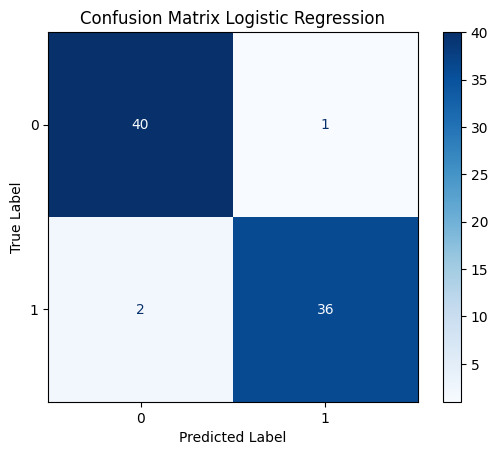

In [113]:
# Prediksi on testing data
y_pred = best_model.predict(X_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')  
disp.ax_.set_title("Confusion Matrix Logistic Regression")
disp.ax_.set_xlabel("Predicted Label")
disp.ax_.set_ylabel("True Label")

# display plot
plt.show()

## 4.9 Feature Importance

Feature Importance for Logistic Regression:
                               Feature  Coefficient  Abs_Coefficient
11                        lama_bekerja    -0.498638         0.498638
0                         jeniskelamin     0.000000         0.000000
1                    statuskepegawaian     0.000000         0.000000
18                  divisi_Engineering     0.000000         0.000000
17                       divisi_Design     0.000000         0.000000
16                         divisi_Data     0.000000         0.000000
15            statuspernikahan_Menikah     0.000000         0.000000
14            statuspernikahan_Lainnya     0.000000         0.000000
13           statuspernikahan_Bercerai     0.000000         0.000000
12      statuspernikahan_Belum_menikah     0.000000         0.000000
10                   usia_saat_dihired     0.000000         0.000000
9         keikutsertaanproject_boolean     0.000000         0.000000
8                    tingkatpendidikan     0.000000        

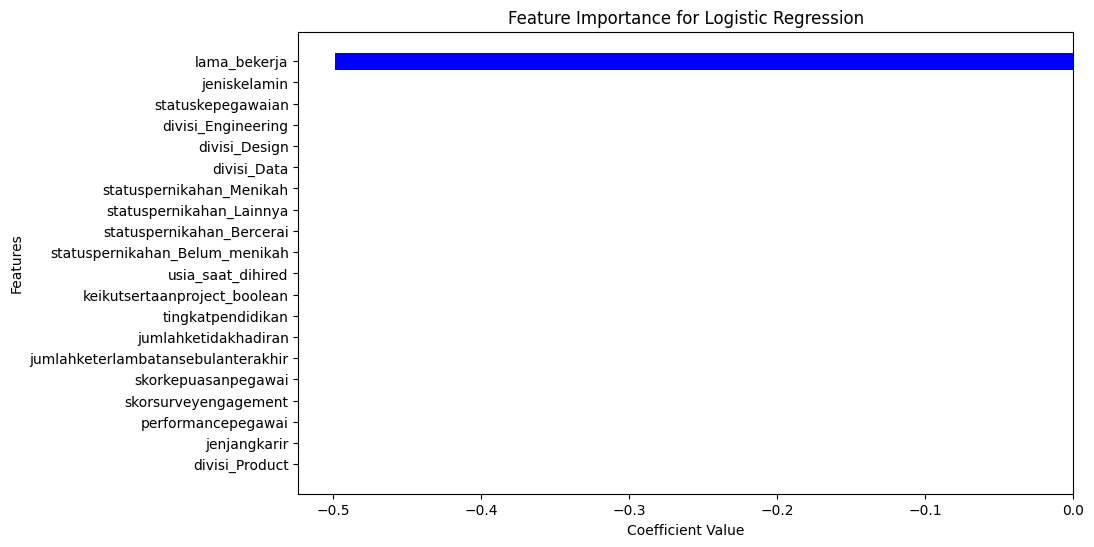

In [109]:
# Get the model coefficients
coefficients = best_model.coef_[0]  # Retrieve coefficients for binary classification model

# Create a DataFrame to display features and their importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Ensure X_train columns have feature names
    'Coefficient': coefficients
})

# Add a column for absolute value to assess magnitude
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()

# Sort features by importance (magnitude of coefficients)
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the results
print("Feature Importance for Logistic Regression:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='Blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression')
plt.gca().invert_yaxis()  # Reverse the order of features for better visualization
plt.show()

# 5. Business Recommendation

| **Key Findings**                                                | **Issues**                                                                                         | **Business Recommendations**                                                                                                                                                                                                                      |
|------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Tenure influences resignation decisions.                        | Employees with approximately 4 years of tenure tend to resign.                                       | Create a mid-tenure retention program specifically for employees with 3–5 years of tenure, such as loyalty bonuses, additional leave, or advanced training opportunities. <br> |
| *Software Engineers* tend to resign due to lack of remote work and work hours. | Work policies are inflexible.                                                                  | Implement a hybrid working or remote work policy. <br>                                |
| High-performing employees tend to resign.                        | Talented employees feel undervalued or see better opportunities elsewhere.                         | Develop a talent retention program, such as advanced training, mentoring, or promotion opportunities. <br>                                |
| Work hours are one of the reasons for resignation.               | Employees feel burnout.                                                                         | Implement work-life balance initiatives, such as a *4-day work week pilot program*. <br>       |
| *Software Engineers* have the highest resignation rate.          | The work environment is less attractive to *Software Engineers*.                                    | Enhance employer branding by promoting exciting projects and advanced technologies used. <br>                                 |
